In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
x = 6 * np.random.rand(200,1)-3
y = 0.8 * x ** 2 +  0.9 * x + 2 + np.random.randn(200,1)

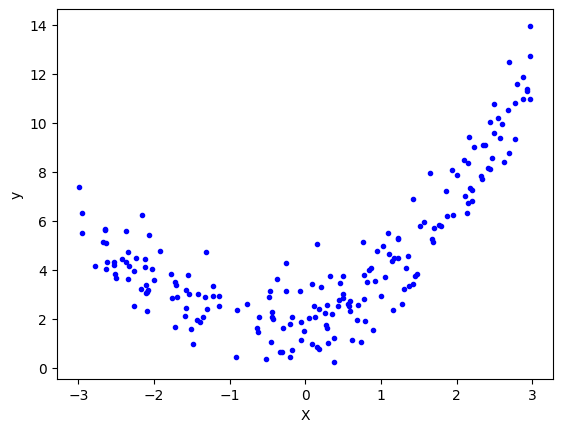

In [3]:
plt.plot(x,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [4]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

## Python Model

In [5]:
class PolynomialRegression:
    def __init__(self, degree):
        self.degree = degree
        self.theta = None

    def _polynomial_features(self, X):
        X = np.array(X).reshape(-1, 1)
        X_poly = np.ones((X.shape[0], 1))  # Bias term
        for d in range(1, self.degree + 1):
            X_poly = np.hstack((X_poly, X ** d))
        return X_poly

    def fit(self, X, y):
        X_poly = self._polynomial_features(X)
        y = np.array(y).reshape(-1, 1)
        self.theta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

    def predict(self, X):
        X_poly = self._polynomial_features(X)
        return X_poly @ self.theta

    def get_intercept(self):
        return self.theta[0][0] if self.theta is not None else None

    def get_coefficients(self):
        return self.theta[1:].flatten() if self.theta is not None else None

In [6]:
model = PolynomialRegression(degree=3)
model.fit(X_train,y_train)

In [7]:
y_pred_1 = model.predict(X_test)

In [8]:
r2_score_1 = r2_score(y_test,y_pred_1)
print(r2_score_1)

0.9094514468966985


In [9]:
x_new=np.linspace(-3, 3, 200).reshape(200, 1)
# x_new_poly = poly.transform(x_new)
y_new = model.predict(x_new)

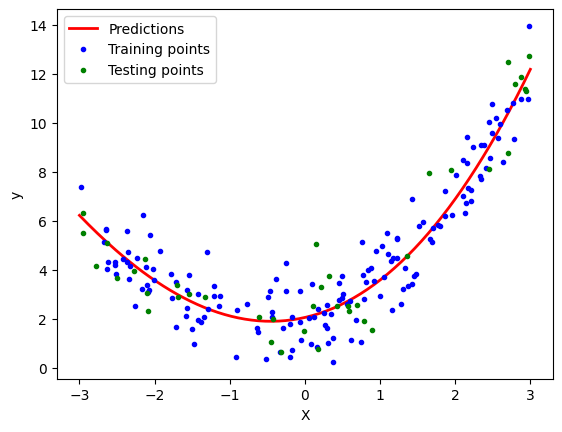

In [10]:
plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Sklearn Model

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [12]:
poly = PolynomialFeatures(degree=2,include_bias=True)

In [13]:
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [14]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
y_pred_2 = lr.predict(X_test_trans)

In [16]:
r2_score_2 = r2_score(y_test,y_pred_2)
print(r2_score_2)

0.9039947539422668


In [17]:
x_new=np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)

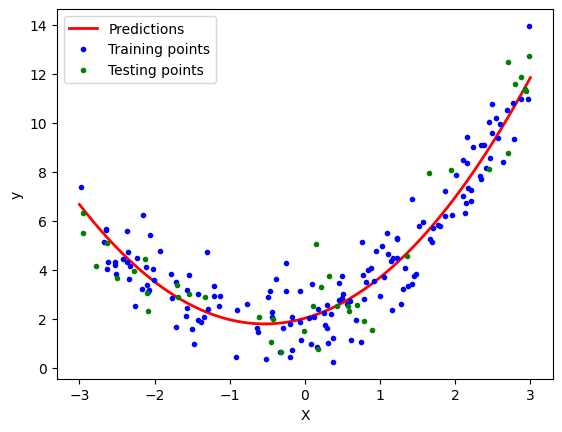

In [18]:
plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [19]:
df = pd.DataFrame({
    'model': ['python_model', 'sklearn_model'],
    'accuracy': [r2_score_1, r2_score_2]
})

In [20]:
df.style.background_gradient(sns.color_palette("YlOrBr", as_cmap=True))

,model,accuracy
0,python_model,0.909451
1,sklearn_model,0.903995


In [21]:
!pip freeze -> requirement.txt